# BDLE TP1 IMDB avec Databricks

révision du 12-10-2020

## Préparation

Commencer par attacher le notebook à un cluster. Cela démarre les _resources_ de calcul pour traiter les cellules du notebook

Environnement d'exécution des requêtes

In [5]:
# on utilise 8 partitions au lieu de 200 par défaut
spark.conf.set("spark.sql.shuffle.partitions", "8")
print("Nombre de partitions utilisées : ", spark.conf.get("spark.sql.shuffle.partitions"))

Nombre de partitions utilisées : 8

URL pour accès aux datasets

In [7]:
# URL du dossier PUBLIC_DATASET contenant des fichiers de données pour les TP
# ---------------------------------------------------------------------------
# en cas de problème avec le téléchargement des datasets, aller directement sur l'URL ci-dessous
PUBLIC_DATASET_URL = "https://nuage.lip6.fr/s/H3bpyRGgnCq2NR4" 
PUBLIC_DATASET=PUBLIC_DATASET_URL + "/download?path="

print("URL pour les datasets ", PUBLIC_DATASET_URL)

URL pour les datasets https://nuage.lip6.fr/s/H3bpyRGgnCq2NR4

### Uploader les datasets de IMDB

Cette étape est à faire une seule fois afin de sauvegarder les données du TP dans votre espace de stockage Databricks.
Télécharger l'archive contenant les fichiers IMDB.
Dans PUBLIC_DATASET https://nuage.lip6.fr/s/H3bpyRGgnCq2NR4
aller dans le dossier imdb/vldb2015 et télécharger le fichier csvfiles_sample001.tgz

Lien direct :
https://nuage.lip6.fr/s/H3bpyRGgnCq2NR4/download?path=/imdb/vldb2015&files=csvfiles_sample001.tgz

Extraire les fichiers csv de l'archive

Menu Data -> Add Data
Sélectionner un nouveau dossier pour _DBFS target directory_  /FileStore/tables/**imdb**
puis uploader tous les fichiers csv dans ce directory.

Liste des fichiers IMDB :

In [11]:
print("imdb")
display(dbutils.fs.ls("dbfs:/FileStore/tables/imdb"))

path,name,size
dbfs:/FileStore/tables/imdb/cast_info.csv,cast_info.csv,15368545
dbfs:/FileStore/tables/imdb/company_name.csv,company_name.csv,894637
dbfs:/FileStore/tables/imdb/company_type.csv,company_type.csv,92
dbfs:/FileStore/tables/imdb/info_type.csv,info_type.csv,1928
dbfs:/FileStore/tables/imdb/kind_type.csv,kind_type.csv,85
dbfs:/FileStore/tables/imdb/movie_companies.csv,movie_companies.csv,956556
dbfs:/FileStore/tables/imdb/movie_info.csv,movie_info.csv,9854170
dbfs:/FileStore/tables/imdb/name.csv,name.csv,17549614
dbfs:/FileStore/tables/imdb/person_info.csv,person_info.csv,145007548
dbfs:/FileStore/tables/imdb/role_type.csv,role_type.csv,160


## Définir les tables de la base IMDB

Le dossier contenant les fichiers csv de IMDB

In [14]:
dir = "/FileStore/tables/imdb/"

La table Title affecte un identifiant id à un film

In [16]:
schema_title = """
          id INT, 
          title STRING, 
          imdb_index STRING, 
          kind_id INT, 
          production_year INT, 
          imdb_id INT, 
          phonetic_code STRING, 
          episode_id STRING,
          season_nr INT, 
          episode_nr INT, 
          series_years STRING, 
          md5sum STRING
        """

title = spark.read.csv(path = dir + "title.csv", schema = schema_title).persist()
title.createOrReplaceTempView("Title")
display(title)

id,title,imdb_index,kind_id,production_year,imdb_id,phonetic_code,episode_id,season_nr,episode_nr,series_years,md5sum
7532,"Beautiful, Married & Missing",null,7,2009,null,B3145,7383,null,null,null,890adf0e8ff5ba69b8f6dc7b0dce84e7
160794,Self-Awareness as a Soldier! Strength Lies in the Pure Heart,null,7,1995,null,S4165,160772,1,38,null,eb32612a744424c3b79a8959c48aa89b
20232,Baby Manning,null,7,1998,null,B152,20037,null,null,null,825389d4e35f378f950238020942782e
16604,The Next First Lady?/Here Comes the Girls/Toni Morrison,null,7,1999,null,N2316,15711,31,20,null,6385686401009aa7277c38cea7db489c
189974,(#1.6),null,7,2000,null,null,189966,1,6,null,2b97f31e49e4cea3da14e1d1292915d2
7034,(2001-04-26),null,7,2001,null,null,6845,null,null,null,b5773a56b3c21479ceada92cb3840612
63988,(2010-04-09),null,7,2010,null,null,63983,null,null,null,0f95b8ecd807c9e10b5181ffab8b6bf7
128719,(1999-03-03),null,7,1999,null,null,128714,null,null,null,0b40df9322c04d540aa496bf719eb265
12434,New Best Friend,null,7,2013,null,N1231,12433,1,3,null,9002eef5ad46236af79c0c7be159668b
109725,(2010-01-04),null,7,2010,null,null,109693,null,null,null,a3ee822c5e48f29313f30f674c5e9e13


La table Kind_type

In [18]:
#============
# Kind_Type
#============
schema_kind_type = "id INT, kind STRING"

kind_type = spark.read.csv(path = dir + "kind_type.csv", schema = schema_kind_type).persist()

kind_type.createOrReplaceTempView("Kind_Type")
#kind_type.printSchema()
display(kind_type)

id,kind
1,movie
2,tv series
3,tv movie
4,video movie
5,tv mini series
6,video game
7,episode


La table Info_type indique la nature d'un attribut d'information. 
Sert dans Movie_Info, Person_Info

In [20]:
#==============
# Info_Type
#==============
schema_info_type = "id INT, info STRING"

info_type = spark.read.csv(path = dir + "info_type.csv", schema = schema_info_type).persist()

info_type.createOrReplaceTempView("Info_Type")
#info_type.printSchema()

display(info_type)

id,info
1,runtimes
2,color info
3,genres
4,languages
5,certificates
6,sound mix
7,tech info
8,countries
9,taglines
10,keywords


La table Movie_info

In [22]:
#==============
# Movie_Info
#==============
schema_movie_info = """
    id int,
    movie_id int,
    info_type_id int,
    info string,
    note string
"""

movie_info = spark.read.csv(path = dir + "movie_info.csv", schema = schema_movie_info).persist()

movie_info.createOrReplaceTempView("Movie_Info")
#movie_info.printSchema()

display(movie_info)

id,movie_id,info_type_id,info,note
11658949,13,16,Italy:29 March 2012,null
11659887,434,16,Netherlands:7 January 2013,null
11661227,1680,16,USA:11 May 2011,null
11661228,1680,16,USA:11 May 2011,null
11661771,1841,16,Spain:20 March 2005,null
11662532,2907,16,Spain:28 September 2002,null
11662603,2977,16,USA:22 August 2011,null
11663044,3228,16,USA:27 September 1997,null
214865,3228,15,"Two-Tone: [watches Nanny set a yard sale box down] Yard sales! I love yard sales! Actually I hate yard sales, the pros of a yard sale are the great bargains but the cons of a yard sale are that everything is used, eww yuck::Cadpig: Two-Tone... FOCUS!",null
214866,3228,15,"Rolly: Anybody want a peanut?... What? It's not like I've offered you some of my food before. Okay, so it's been a while.",null


La table Cast_Info

In [24]:
#==============
# Cast_Info
#==============
schema_cast_info = """
  id int,
  person_id int,
  movie_id int,
  person_role_id int,
  note string,
  nr_order int,
  role_id int
"""

cast_info = spark.read.csv(path = dir + "cast_info.csv", schema = schema_cast_info).persist()

cast_info.createOrReplaceTempView("Cast_Info")
#cast_info.printSchema()

display(cast_info)

id,person_id,movie_id,person_role_id,note,nr_order,role_id
16255404,2202581,434,2671901,null,9,2
31519800,3558778,434,null,null,null,9
16668206,2256708,434,2264435,null,2,2
1148671,159670,434,271127,null,1,1
18308464,2464312,434,2922782,null,null,2
3164925,423423,434,9407,null,null,1
19291922,2593019,434,3040044,null,4,2
5264485,705755,434,1013996,null,3,1
19618701,2634949,434,2182050,null,5,2
5806077,786248,434,1107705,null,6,1


La table Role_type

In [26]:
#=============
# Role_Type
#=============
schema_role_type = "id INT, role STRING"

role_type = spark.read.csv(path = dir + "role_type.csv", schema = schema_role_type).persist()

role_type.createOrReplaceTempView("Role_Type")
#role_type.printSchema()

display(role_type)

id,role
1,actor
2,actress
3,producer
4,writer
5,cinematographer
6,composer
7,costume designer
8,director
9,editor
10,miscellaneous crew


La table Name affecte un identifiant id à une personne

In [28]:
#==============
# Name 
#==============
schema_name = """
  id int,
  name string,
  imdb_index string,
  imdb_id int,
  gender string,
  name_pcode_cf string,
  name_pcode_nf string,
  surname_pcode string,
  md5sum string
"""

name = spark.read.csv(path = dir + "name.csv", schema = schema_name).persist()

name.createOrReplaceTempView("Name")
#name.printSchema()

display(name)

id,name,imdb_index,imdb_id,gender,name_pcode_cf,name_pcode_nf,surname_pcode,md5sum
333,"5, Johnny",null,null,m,J5,null,null,c845df6a62d46f897c7620f00f1e97a5
339,50 Cent,null,null,m,C53,null,null,faba8d4ac1b5880ef64a5de3ea7d1fa9
400,"A El Rahim, Ahmed",null,null,m,A4653,A5346,A465,9698c31ec0eb8b38172ae89e8c67b028
457,"A., Kodanda Rami Reddy",null,null,m,A2353,K3536,A,64223f8728574d3dce39126c365b5dc9
471,"A., Randy",null,null,m,A653,R53,A,b5301fd59f93e50ab8893e9b80e3a35a
624,"Aaker, Lee",null,null,m,A264,L26,A26,e15546bb152954e379a3554c28125661
673,"Aalto, Kari",null,null,m,A4326,K643,A43,8ad8a724a6ef5f40400c149162e12821
750,"Aames, Willie",null,null,m,A524,W452,A52,f983dd44bb1392c1575dfe5ffb087e1b
763,"Aamund, Asger",null,null,m,A5326,A2653,A53,0b6579030aba0724f451098c3bd533db
771,"Aanensen, Peter",null,null,m,A5251,P3652,A525,1d4412351d4d6c5cfd6eb93eea053f25


La table Person_Info

In [30]:
#==============
# Person_Info
#==============
schema_person_info = """
  id int,
  person_id int,
  info_type_id int,
  info string,
  note string
"""

person_info = spark.read.csv(path = dir + "person_info.csv", schema = schema_person_info).persist()
person_info.createOrReplaceTempView("Person_Info")

display(person_info)

id,person_id,info_type_id,info,note
302,333,33,(2012) Portlandia,null
303,333,26,"Martini-Connally, John",null
304,333,20,"Los Angeles, California, USA",null
305,333,17,"Has worked & studied alongside studio engineer giants like 'Kelley Baker (I)' (qv), 'Wayne Woods (I)' (qv), 'Paul Nelson (VIII)' (qv), 'John Neff' (qv), 'Russ Gorsline' (qv), 'Colin O'Neill (I)' (qv), 'Matt Meyer (II)' (qv), Brent Rogers, Randy Johnson, and 'Will Vinton' (qv).",null
306,333,17,Bachelors in Digital Media Production from the Art Institute of Portland.,null
307,333,17,Nephew of writer/director 'Richard Martini (I)' (qv).,null
308,333,17,Related to former Texas Governor & U.S. Secretary of the Treasury 'John Connally (I)' (qv).,null
309,333,21,7 September 1984,null
310,339,37,"""Big Fish"" (Greece), 4 June 2006, Iss. 28",null
311,339,37,"""Hitkrant"" (Netherlands), 19 March 2005, Iss. 11",null


La table Movie_Companies

In [32]:
#==============
# Movie_Companies
#==============
schema_movie_companies = """
    id int,
    movie_id int,
    company_id int,
    company_type_id int,
    note string
"""

movie_companies = spark.read.csv(path = dir + "movie_companies.csv", schema = schema_movie_companies).persist()

movie_companies.createOrReplaceTempView("Movie_Companies")
#movie_companies.printSchema()

display(movie_companies)

id,movie_id,company_id,company_type_id,note
1318,3342,216,1,(2000) (USA) (TV)
1319,3342,217,1,(200?) (Japan) (TV)
1454,3981,46,1,(2009) (Hungary) (TV)
2889,8413,423,1,(2007) (Japan) (DVD)
2890,8413,49,1,(1987-1990) (USA) (TV) (original airing)
2891,8413,428,1,(2010) (USA) (DVD)
1276676,8413,71104,2,(producer)
1276677,8413,71105,2,(in association with)
4284,9005,21,1,(2010) (Australia) (TV)
4285,9005,49,1,(2010) (USA) (TV)


La table Company_Name

In [34]:
schema_company_name = """
    id int,
    name string,
    country_code string,
    imdb_id int,
    name_pcode_nf string,
    name_pcode_sf string,
    md5sum string
"""

company_name = spark.read.csv(path = dir + "company_name.csv", schema = schema_company_name)
company_name.createOrReplaceTempView("Company_Name")
#company_name.printSchema()

display(company_name)

id,name,country_code,imdb_id,name_pcode_nf,name_pcode_sf,md5sum
1,E! Entertainment Television,[us],null,E5363,E5363,ddc1ca3453a33526ad931106cb60d004
2,YouTube,[us],null,Y31,Y312,3bd77ab33669d8883d345ee754928caf
4,5*,[gb],null,null,G1,2c0b57f4db6ba181ca8e7414284e9d35
5,Canadian Television (CTV),[ca],null,C5353,C5353,7bde1000f06906373c3ae6a48d981511
6,Columbia Broadcasting System (CBS),[us],null,C4516,C4516,7ae3ee174d2d4b06fc3d2ba6d7dc2fab
7,Nine Network Australia,[au],null,N5362,N5362,70a4657ea90ca544e4071e363774cc7c
8,Veronica,[nl],null,V652,V6525,28f313ed51c6f708e6755e2d5d34f0a3
9,Warner Channel Latin America,[br],null,W6562,W6562,eb1f896ee609e97cfbfb007f3de1afa5
10,Lorimar Telepictures,[us],null,L6563,L6563,6c941a84e38309ddf60871f4b76d8b53
11,Warner Bros. Television,[us],null,W6561,W6561,259d3edf9bdf0b20fc2db3e494113e99


La table Company_type

In [36]:
#==============
# Company_Type
#==============
schema_company_type = "id INT, kind STRING"

company_type = spark.read.csv(path = dir + "company_type.csv", schema = schema_company_type).persist()
company_type.createOrReplaceTempView("Company_Type")
#company_type.printSchema()

display(company_type)

id,kind
1,distributors
2,production companies
3,special effects companies
4,miscellaneous companies


## Exemples de requêtes

Rmq : dans une cellule de code, possibilité de faire _Run All Above_ pour traiter toutes les cellules précédentes.

### Requêtes sur les films : fichier title

In [40]:
%sql
select *
from title

id,title,imdb_index,kind_id,production_year,imdb_id,phonetic_code,episode_id,season_nr,episode_nr,series_years,md5sum
7532,"Beautiful, Married & Missing",null,7,2009,null,B3145,7383,null,null,null,890adf0e8ff5ba69b8f6dc7b0dce84e7
160794,Self-Awareness as a Soldier! Strength Lies in the Pure Heart,null,7,1995,null,S4165,160772,1,38,null,eb32612a744424c3b79a8959c48aa89b
20232,Baby Manning,null,7,1998,null,B152,20037,null,null,null,825389d4e35f378f950238020942782e
16604,The Next First Lady?/Here Comes the Girls/Toni Morrison,null,7,1999,null,N2316,15711,31,20,null,6385686401009aa7277c38cea7db489c
189974,(#1.6),null,7,2000,null,null,189966,1,6,null,2b97f31e49e4cea3da14e1d1292915d2
7034,(2001-04-26),null,7,2001,null,null,6845,null,null,null,b5773a56b3c21479ceada92cb3840612
63988,(2010-04-09),null,7,2010,null,null,63983,null,null,null,0f95b8ecd807c9e10b5181ffab8b6bf7
128719,(1999-03-03),null,7,1999,null,null,128714,null,null,null,0b40df9322c04d540aa496bf719eb265
12434,New Best Friend,null,7,2013,null,N1231,12433,1,3,null,9002eef5ad46236af79c0c7be159668b
109725,(2010-01-04),null,7,2010,null,null,109693,null,null,null,a3ee822c5e48f29313f30f674c5e9e13


#### Nombre de films

In [42]:
%sql
select count(*) as nbFilms 
from Title

nbFilms
25084


#### Les types de films

In [44]:
%sql
select distinct kind_id 
from Title 
order by kind_id

kind_id
1
2
3
4
6
7


#### Nombre de films par type de film

In [46]:
%sql
select kind_id, count(*) as nb 
from Title 
group by kind_id 
order by nb desc

kind_id,nb
7,15274
1,6602
4,1175
3,979
2,925
6,129


#### Nombre de film par années

In [48]:
%sql
select production_year, count(*) as nbFilms
from Title
where production_year is not null
group by production_year
order by nbFilms desc

production_year,nbFilms
2012,1605
2011,1517
2010,1467
2009,1301
2008,1192
2007,1186
2006,1033
2005,948
2004,854
2003,676


#### Distribution d'un attribut avec describe()

In [50]:
filmPerYear = spark.sql("""
select production_year, count(*) as nb
from Title
where production_year is not null
group by production_year
order by nb desc
""")

description = filmPerYear.describe('nb')
display(description)

summary,nb
count,122
mean,199.7377049180328
stddev,331.00849663956
min,1
max,1605


#### Visualiser le nombre de films par années

[Documentation MatplotLib](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)

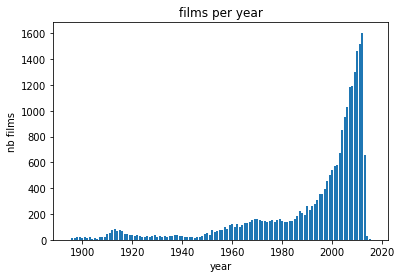

In [53]:
import matplotlib.pyplot as plt

t = filmPerYear.collect()

tabYear = [x.production_year for x in t]
tabNb = [x.nb for x in t]

plt.bar(tabYear, tabNb)
plt.xlabel('year')
plt.ylabel('nb films')
plt.title('films per year')
plt.show()

### Requêtes sur les types de films : kind_type

In [55]:
%sql
SELECT * 
FROM Kind_type

id,kind
1,movie
2,tv series
3,tv movie
4,video movie
5,tv mini series
6,video game
7,episode


#### Jointure entre Title et Kind_Type

In [57]:
title.printSchema()

root
-- id: integer (nullable = true)
-- title: string (nullable = true)
-- imdb_index: string (nullable = true)
-- kind_id: integer (nullable = true)
-- production_year: integer (nullable = true)
-- imdb_id: integer (nullable = true)
-- phonetic_code: string (nullable = true)
-- episode_id: string (nullable = true)
-- season_nr: integer (nullable = true)
-- episode_nr: integer (nullable = true)
-- series_years: string (nullable = true)
-- md5sum: string (nullable = true)

In [58]:
%sql
SELECT k.kind, t.title, t.production_year 
FROM Title t, Kind_Type k 
WHERE t.kind_id = k.id
ORDER BY t.production_year DESC

kind,title,production_year
movie,Star Trek 3,2016
movie,The Bonus Army,2015
movie,The Smoker,2015
movie,Hundred Degrees in the Shade,2015
movie,Arclight,2015
movie,Bad Boys Crazy Girls,2014
movie,Left Behind,2014
tv movie,Once Upon a Time in Beverly Hills,2014
tv series,Witness Protection: Return of the Prophet,2014
movie,6 Days Watching,2014


#### Nombre de films par type

In [60]:
%sql
SELECT k.kind, count(*) as nb
FROM Title t, Kind_Type k 
WHERE t.kind_id = k.id
GROUP BY k.kind
ORDER BY count(*) DESC

kind,nb
episode,15274
movie,6602
video movie,1175
tv movie,979
tv series,925
video game,129


### Requêtes sur les rôles : cast_info

#### Une personne a un ou plusieurs roles dans un film

In [63]:
cast_info.printSchema()

root
-- id: integer (nullable = true)
-- person_id: integer (nullable = true)
-- movie_id: integer (nullable = true)
-- person_role_id: integer (nullable = true)
-- note: string (nullable = true)
-- nr_order: integer (nullable = true)
-- role_id: integer (nullable = true)

In [64]:
cast_info.count()

Out[53]: 360035

#### Nombre de roles par personne

In [66]:
res2 = spark.sql("""

select person_id, count(*) as nbRoles
from Cast_Info
group by person_id
order by nbRoles desc

""")
res2.persist()
res2.show(5)

+---------+-------+
person_id|nbRoles|
+---------+-------+
 175411| 120|
 95397| 118|
 515315| 108|
 1495180| 105|
 677696| 90|
+---------+-------+
only showing top 5 rows

descrire la distribution de l'attribut nbRoles

In [68]:
d = res2.describe('nbRoles')
d.show()

+-------+------------------+
summary| nbRoles|
+-------+------------------+
 count| 214749|
 mean|1.6765386567574239|
 stddev|1.9565121381308854|
 min| 1|
 max| 120|
+-------+------------------+

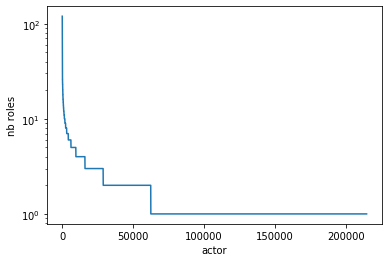

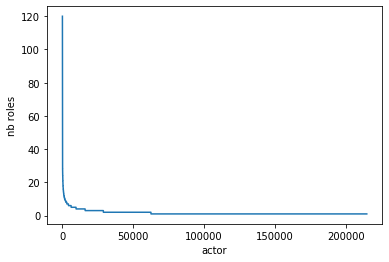

In [69]:
#t2 = res2.sample(0.01).collect()
t2 = res2.collect()

tabNb = [x.nbRoles for x in t2]

plt.yscale('log')
plt.plot(tabNb) 
plt.xlabel('actor')
plt.ylabel('nb roles')

#plt.hist(tabNb)
plt.show()

plt.yscale('linear')
plt.plot(tabNb) 
plt.xlabel('actor')
plt.ylabel('nb roles')

plt.show()

#### Le nombre de rôles par type de film depuis 2010

In [71]:
res3 = spark.sql("""
SELECT g.kind, count(*) as nb_roles
FROM Cast_Info c, Title f, Kind_type g
WHERE c.movie_id = f.id AND f.kind_id = g.id
AND f.production_year > 2010
GROUP BY g.kind
ORDER BY nb_roles desc
""")
res3.show(5)

+-----------+--------+
 kind|nb_roles|
+-----------+--------+
 episode| 36527|
 movie| 15897|
 tv movie| 1842|
video movie| 1421|
 tv series| 943|
+-----------+--------+
only showing top 5 rows

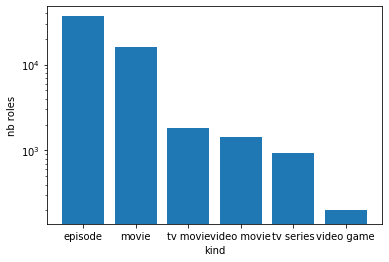

In [72]:
t3 = res3.collect()

tabNb = [x.nb_roles for x in t3]
tabKind = [x.kind for x in t3]

plt.yscale('log')
plt.bar(tabKind,tabNb) 
plt.xlabel('kind')
plt.ylabel('nb roles')

#plt.hist(tabNb)

plt.show()

## Autres traitements

### Extraction de la date de sortie _release_dates_

###### Rappel du schéma des tables 
Title et Movie_info

In [76]:
%sql
desc Title

col_name,data_type,comment
id,int,null
title,string,null
imdb_index,string,null
kind_id,int,null
production_year,int,null
imdb_id,int,null
phonetic_code,string,null
episode_id,string,null
season_nr,int,null
episode_nr,int,null


In [77]:
%sql
desc Movie_info

col_name,data_type,comment
id,int,null
movie_id,int,null
info_type_id,int,null
info,string,null
note,string,null


#### Informations détaillées sur toutes les propriétés d'une oeuvre

Jointure pour avoir le détail des attributs décrivant une oeuvre cinématographique

In [80]:
%sql
create or replace temp view TitleDetail as
select t.id, t.title, t.production_year, k.kind, it.info as property, m.info as value
from Title t, Movie_Info m, Info_type it, Kind_Type k
where t.id = m.movie_id 
and m.info_type_id = it.id
and t.kind_id = k.id
;

select * 
from TitleDetail t
order by  t.production_year desc, t.title
limit 100;

id,title,production_year,kind,property,value
2310404,Star Trek 3,2016,movie,genres,Sci-Fi
2310404,Star Trek 3,2016,movie,countries,USA
2310404,Star Trek 3,2016,movie,release dates,USA:2016
2310404,Star Trek 3,2016,movie,languages,English
2310404,Star Trek 3,2016,movie,color info,Color
2310404,Star Trek 3,2016,movie,genres,Adventure
2310404,Star Trek 3,2016,movie,genres,Action
1694099,Arclight,2015,movie,genres,Sci-Fi
1694099,Arclight,2015,movie,countries,USA
1963857,Hundred Degrees in the Shade,2015,movie,genres,Drama


Mémoriser le résultat de TitleDetail pour éviter de le calculer plusieurs fois

In [82]:
%sql
cache table TitleDetail

Une oeuvre peut avoir les propriétés suivantes

In [84]:
%sql
select distinct t.property as title_property
from TitleDetail t
order by title_property desc

title_property
weekend gross
trivia
tech info
taglines
sound mix
screenplay-teleplay
runtimes
rentals
release dates
quotes


#### Informations détaillées sur toutes les propriétés d'une personne

In [86]:
%sql
create or replace temp view NameDetail as
select n.id, n.name, n.gender, i.info as property, p.info as value
from Name n, Person_Info p, Info_type i
where n.id = p.person_id
and p.info_type_id = i.id
;
 
select * 
from NameDetail n
where n.name like 'Smi%'
order by n.name, n.property
limit 100;

id,name,gender,property,value
2544489,"Smid, Coosje",f,trivia,Daughter of 'Ernst Daniël Smid' (qv) and Rosemarie Giesen van der Sluis.
1454381,"Smid, Ernst Daniël",m,birth date,6 May 1953
1454381,"Smid, Ernst Daniël",m,birth notes,"Enschede, Overijssel, Netherlands"
1454381,"Smid, Ernst Daniël",m,magazine cover photo,"""Ncrv Gids"" (Netherlands), 17 April 1999, Iss. 16"
1454381,"Smid, Ernst Daniël",m,other works,Provided the voice of Alameda Slim in the Dutch version of _Home on the Range (2004)_ (qv).
1454381,"Smid, Ernst Daniël",m,other works,Provided the voice of Gouverneur Ratcliffe in the Dutch version of _Pocahontas (1995)_ (qv).
1454381,"Smid, Ernst Daniël",m,other works,Provided the voice of Clayton in the Dutch version of _Tarzan (1999)_ (qv).
1454381,"Smid, Ernst Daniël",m,other works,Provided the voice of Generaal in the Dutch version of _Thunderpants (2002)_ (qv).
1454381,"Smid, Ernst Daniël",m,other works,Provided the voice of Gouverneur Ratcliffe in the Dutch version of _Pocahontas II: Journey to a New World (1998) (V)_ (qv).
1454381,"Smid, Ernst Daniël",m,other works,Provided the voice of Thunder-Karlsson (Donderkarel) in the Dutch version of _Pippi Longstocking (1997)_ (qv).


Mémoriser le résultat de NameDetail pour éviter de le calculer plusieurs fois

In [88]:
%sql
cache table NameDetail;

Une personne peut avoir les propriétés suivantes

In [90]:
%sql
select distinct t.property as name_property
from NameDetail t
order by name_property

name_property
article
biographical movies
birth date
birth name
birth notes
books
death date
death notes
height
interviews


#### Structurer la date de sortie d'un film
sélection des infos sur la date de sortie

In [92]:
%sql
create or replace temp view Release_Date as
select t1.id, t1.title, t1.value as release_date
from TitleDetail t1
where t1.property = "release dates";

select * from Release_Date limit 3;

id,title,release_date
13,Intro: By My Side,Italy:29 March 2012
434,Brand in Mokum,Netherlands:7 January 2013
1680,A Tiny Problem in the Kitchen,USA:11 May 2011


découper la chaine _release_date_  pour séparer  le pays et la date

In [94]:
%sql
create or replace temp view SplitDate as 
select r.id, r.title, split(release_date, ':') as splitDate
from Release_Date r;

select *  from SplitDate s limit 3;

id,title,splitDate
13,Intro: By My Side,"List(Italy, 29 March 2012)"
434,Brand in Mokum,"List(Netherlands, 7 January 2013)"
1680,A Tiny Problem in the Kitchen,"List(USA, 11 May 2011)"


In [95]:
%sql
create or replace temp view CountryDMY as 
select s.id, s.title, element_at(s.splitDate, 1) as country, split(element_at(s.splitDate, 2),' ') as DMY
from SplitDate s
;

select * from  CountryDMY limit 3;

id,title,country,DMY
13,Intro: By My Side,Italy,"List(29, March, 2012)"
434,Brand in Mokum,Netherlands,"List(7, January, 2013)"
1680,A Tiny Problem in the Kitchen,USA,"List(11, May, 2011)"


extraire les attributs : day, month, year

In [97]:
%sql
-- à compléter

### Diverses requêtes

#### Exemple de jointure naturelle vs. jointure externe

Jointure naturelle: Seulement les films possédant la propriété _color info_

In [101]:
%sql
-- on sait que la référence info_type_id vaut 2 pour 'color info' dans Movie_Info

select t.id, t.title, m.info as color_info
from Title t, Movie_Info m
where t.id = m.movie_id 
and m.info_type_id = 2
order by id
limit 5;

id,title,color_info
54,"Easy, Writer",Color
160,"Mystic, CT",Color
296,Camp Dance,Color
358,The Great Un-Escape,Color
614,Dream Weaver,Color


Jointure externe: Tous les films y compris ceux ne possédant pas d'attribut _color info_

In [103]:
%sql
-- on sait que la référence info_type_id vaut 2 pour 'color info' dans Movie_Info

select t.id, t.title, m.info as color_info
from Title t left outer join  Movie_Info m on (t.id = m.movie_id  and m.info_type_id = 2)
order by id
limit 5;

id,title,color_info
13,Intro: By My Side,null
54,"Easy, Writer",Color
72,"Elise & Bobby (Austin, TX)",null
92,"Fat Joe, Juvenile & T.I.",null
160,"Mystic, CT",Color


#### Questions diverses
Quels sont tous les noms d'attributs en rapport avec une date ?

In [105]:
%sql
select *
from Info_type t
where t.info like '%date%'

id,info
16,release dates
21,birth date
23,death date
50,LD release date
102,production dates
104,filming dates


Quelle est la syntaxe de la fonction **if** dans la clause select ?

In [107]:
%sql
select n.name, n.gender, if(gender='m', 'Mr' , if(gender='f', 'Mme', 'Inconnue' )) as civilite
from Name n
where name like '%isa';

name,gender,civilite
"Bacic, Ljubisa",m,Mr
"Georgijevski, Ljubisa",m,Mr
"Hattori, Katsuhisa",m,Mr
"Ishikawa, Mitsuhisa",m,Mr
"Morikawa, Tokihisa",m,Mr
"Pavic, Sinisa",m,Mr
"Sakurada, Munehisa",m,Mr
"Stosic, Ljubisa",m,Mr
"Suzuki, Tatsuhisa",m,Mr
"Trajkovski, Ljubisa",m,Mr


## Travail à faire 
Voir la page Projet1 de l'UE BDLE http://www-bd.lip6.fr/wiki/site/enseignement/master/bdle/start